In [1]:
import pandas as pd
import numpy as np                       #importing libraries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

dataset1 = pd.read_csv('bank-full.csv', sep = ';')   #loading data from the main file
dataset1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
#size of data set is 45211 rows and 17 columns, which implies 16 of them as base feautres choices.

# View the first 5 rows in the dataset for evaluation
dataset1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#next step is to clean the data set, i.e either to input all the missing data or remove it. 
# It also means to clean/clear the helpless values/bases feature choices from out data set like poutcome

# Step 1: Delete the rows which colume 'poutcome' contains 'other'
condition1 = dataset1.poutcome == 'other'
dataset2 = dataset1.drop(dataset1[condition1].index, axis = 0, inplace = False)
dataset2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
#next step is to clean the eduction and job data, we will replace the unkown from both to other 
print("Before exchanging \n",dataset2[["job","education"]].head(),"\n") 
dataset3 = dataset2.copy(deep = True)#copying the dataset2 to dataset3
#dataset3 = dataset2 is wrong as changes made to one is also reflected in the other

x = dataset3[["job","education"]] = dataset3[["job","education"]].replace(['unknown'],'other',inplace = False)
#replacing unknown parameter from job/education to other
print("After exchanging \n",x.head())
dataset3.head()

Before exchanging 
             job  education
0    management   tertiary
1    technician  secondary
2  entrepreneur  secondary
3   blue-collar    unknown
4       unknown    unknown 

After exchanging 
             job  education
0    management   tertiary
1    technician  secondary
2  entrepreneur  secondary
3   blue-collar      other
4         other      other


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#After dropping and cleaning data, Our next task is to identify the outlier category(if any) and drop the outlier rows.

from scipy.stats import zscore   #loading zscore module

mean_balance = dataset3[['balance']].mean()  #taking out the mean
dataset3['balance_outliers'] = dataset3['balance']   #making a new column for balance outliers
dataset3['balance_outliers'] = zscore(dataset3['balance_outliers'])  #giving value of balanceoutliers by assigning the 
#value of Sd.
condition2 = (dataset3['balance_outliers']>3) | (dataset3['balance_outliers']<-3 ) #condition for checking SD.
dataset4 = dataset3.drop(dataset3[condition2].index, axis = 0, inplace = False)# dropping rows
dataset4.drop("balance_outliers",axis = 1,inplace = True) #dropping balance outlier column
dataset4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
#next, 000Some changes are being made to the column name, units and data types for easier analysis.

dataset4.rename(index=str, columns={'y': 'response'}, inplace = True)   #renaming the column heading
def convert(dataset4, new_column, old_column):
    dataset4[new_column] = dataset4[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return dataset4[new_column].value_counts()   #function for assigning 0 to no and 1 to yes

print(convert(dataset4, "response_binary", "response"))
dataset4.tail()


0    37785
1     4870
Name: response_binary, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [7]:
dataset5 = dataset4.drop(['contact','response'], axis=1)  #dropping contact feature and response feature as it is useless
dataset5["duration"] = dataset5["duration"].apply(lambda n:n/60).round(2)  # changing mins to seconds

condition3 = (dataset5['duration']<5/60)            #condition for checking minimum time
dataset6 = dataset5.drop(dataset5[condition3].index, axis = 0, inplace = False) #droping the rows
condition4 = (dataset6['education'] == 'other') #condtion checking fro other in education
dataset7 = dataset6.drop(dataset6[condition4].index, axis = 0, inplace = False) #droppping
    
dataset7.head()    

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0


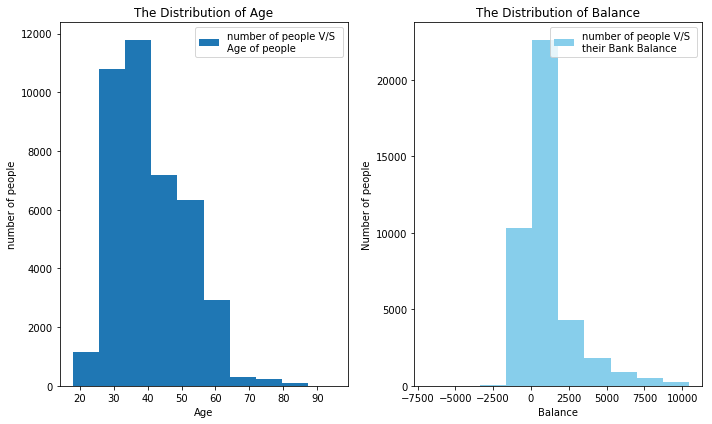

In [8]:

#here, Our Data cleaning part is complete. Next step is to analyse data, i.e. EDA(Exploratory Data Analysis) 

dist_age_balance = plt.figure(figsize = (10,6))   #dist_age_balance is the name of our figure.

ra1 = dist_age_balance.add_subplot(1,2,1) #adding subplot
ra2 = dist_age_balance.add_subplot(1,2,2)   

ra1.hist(dataset7['age'],label = 'number of people V/S \nAge of people')
ra1.legend()                                      
ra1.set_ylabel('number of people')#subplot 1 features
ra1.set_xlabel('Age')
ra1.set_title('The Distribution of Age')

ra2.hist(dataset7['balance'],label = 'number of people V/S \ntheir Bank Balance', color = 'skyblue')
ra2.set_ylabel('Number of people')  #subplot 2 features
ra2.set_xlabel('Balance')
ra2.legend()
ra2.set_title('The Distribution of Balance')

plt.tight_layout() #type of layout
plt.show()

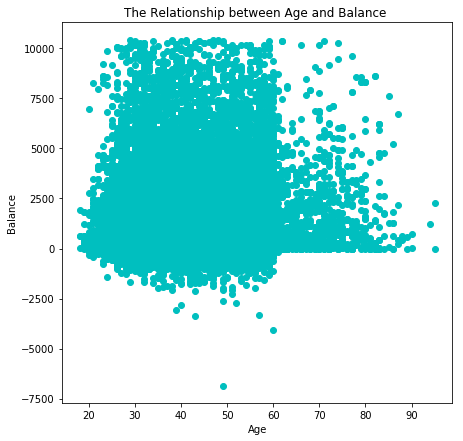

In [9]:
#visualizing Age and balance relation
plt.figure("age_balance",figsize = (7,7))
plt.scatter(dataset7['age'],dataset7['balance'],color =  'c')  #plotting the scatter plot  

plt.title('The Relationship between Age and Balance ')
plt.xlabel('Age')# features for this plot
plt.ylabel('Balance')
plt.show()


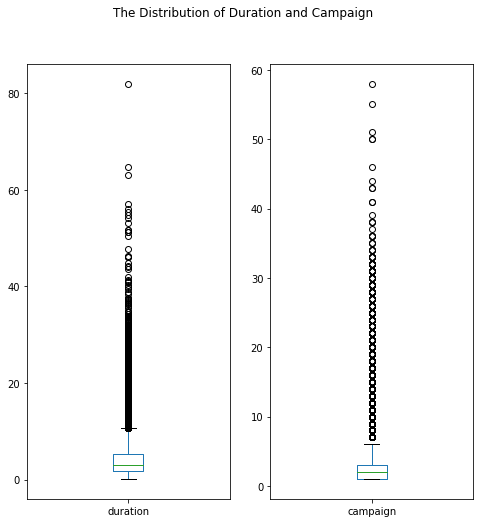

In [10]:
#over the age of 60, clients tend to have a significantly lower balance. 
#This is due to the fact that most people retire after 60 and no longer have a reliable income source.

dist_dur_cam = dataset7[['duration','campaign']].plot(kind = 'box', figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
#plotting the box plot 
plt.show()


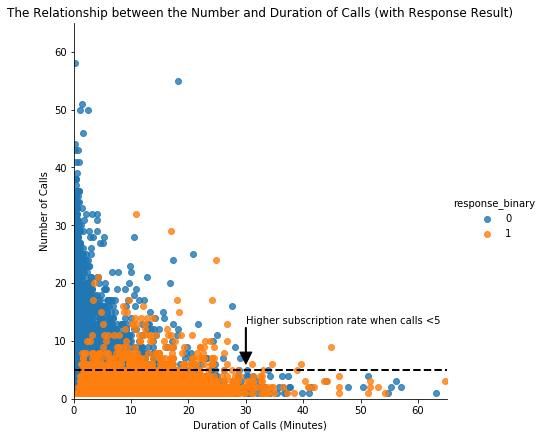

In [11]:
#Visualizing the relationship between 'duration' & 'campaign': with response result
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = dataset7, hue = 'response_binary', fit_reg = False,height = 6)      
#plotting a lmplot for the relation between duration, campaign and response_binary
plt.axis([0,65,0,65])#axis min and maximum points
plt.ylabel('Number of Calls')    
plt.xlabel('Duration of Calls (Minutes)')  #features
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

plt.axhline(y=5, linewidth=2,color="k", linestyle='--')                  #speical features to be displayed on the plot
plt.annotate('Higher subscription rate when calls <5',xytext = (30,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()



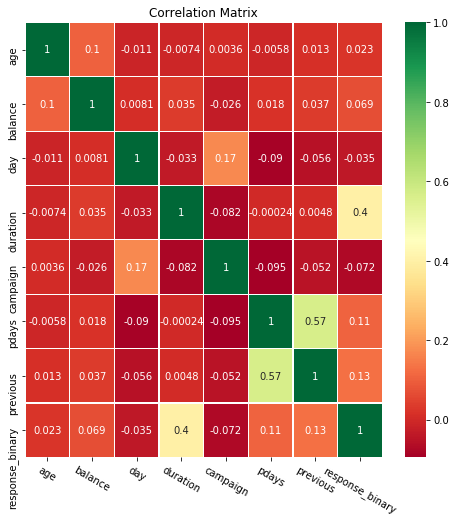

In [12]:
corre = dataset7.corr()
plt.figure(figsize = (8,8))
cor_plot = sns.heatmap(corre,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})  #corelation matrix
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)#corelation matrix features
plt.title('Correlation Matrix')
plt.show()


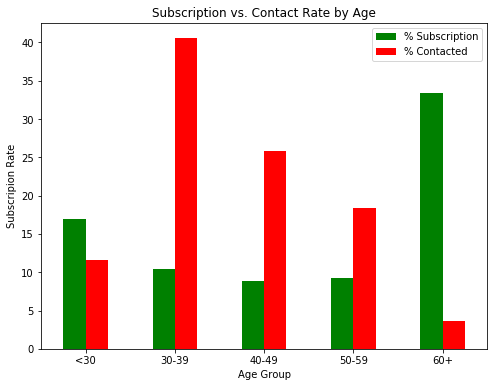

In [13]:
lst = [dataset7]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
count_age_response_pct = pd.crosstab(dataset7['response_binary'],dataset7['age_group']).apply(lambda x: x/x.sum() * 100)

count_age_response_pct = count_age_response_pct.transpose() 
age = pd.DataFrame(dataset7['age_group'].value_counts())

age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct[1]
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]                   #getting the subsription and contacted percent based on age
age = age.sort_values('age',ascending = True)

plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                             figsize=(8,6), color = ('green','red'))
#bar graph for subsrciption percent vs contacted percent based on age
plt.xlabel('Age Group')
plt.ylabel('Subscripion Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()




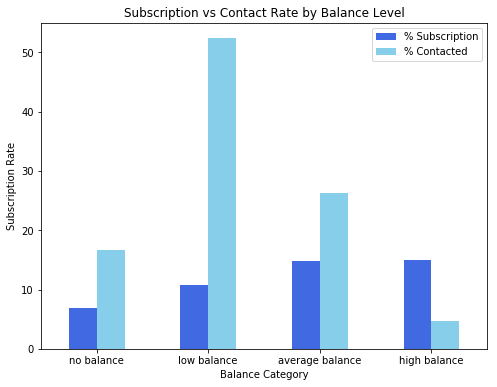

In [14]:

lst = [dataset7]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'

count_balance_response_pct = pd.crosstab(dataset7['response_binary'],dataset7['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

#getting the subsription and contacted percent based on balance

bal = pd.DataFrame(dataset7['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','skyblue'),
                                               figsize = (8,6))
#bar graph for subsrciption percent vs contacted percent based on balance level
plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')
plt.show()

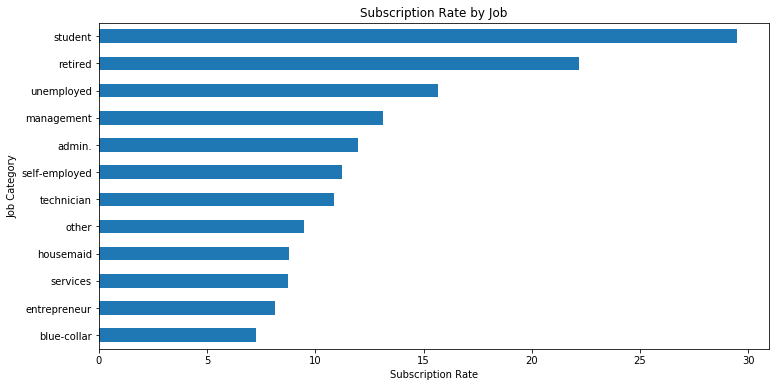

In [15]:
count_job_response_pct = pd.crosstab(dataset7['response_binary'],dataset7['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
#getting the subsription and contacted percent based on job
plot_job = count_job_response_pct[1].sort_values(ascending = True).plot(kind ='barh',
                                                                        figsize = (12,6))
                              #bar graph for subsrciption percent vs contacted percent based on job                                                 
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')     
plt.show()
dataset7.head()
dataset7.to_csv("bank_clean.csv",index = False)